In [1]:
# supervised learning - regression analysis

# removing multicollinearity

# import pandas
import pandas as pd

# read the blood pressure dataset
data = pd.read_csv("bloodpress.txt", sep='\t')

# see the top records in the data
data.head()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95


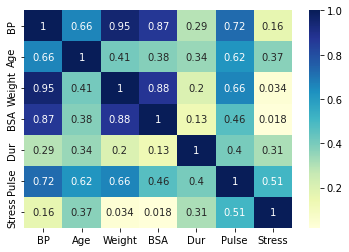

In [3]:
# import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = data.corr()

# plot heatmap on correlation matrix
sns.heatmap(corr, annot=True, cmap='YlGnBu')

# display the plot
plt.show()

In [4]:
# dummy variables

# create pandas DataFrame
data = pd.DataFrame({'Gender':['F','M','M','F','M']})

# check the top-5 records
data.head()

,Gender
0,F
1,M
2,M
3,F
4,M


In [5]:
# dummy encoding
encoded_data = pd.get_dummies(data['Gender'])

# check the top-5 records of the dataframe
encoded_data.head()

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [6]:
# dummy encoding 
encoded_data = pd.get_dummies(data['Gender'], drop_first=True)

# check the top-5 records of the dataframe
encoded_data.head()

,M
0,0
1,1
2,1
3,0
4,1


In [7]:
# developing a linear regression model

# read the dataset using read_csv mothod
df = pd.read_csv("Advertising.csv")

# see the top-5 records in the data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
# Independent variables or Features
X = df[['TV', 'Radio', 'Newspaper']]

# Dependent or Target variable
y = df.Sales

In [9]:
# Lets import the train_test_split method
from sklearn.model_selection import train_test_split

# Distribute the features(X) and labels(y) into two parts
# trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size = 0.25, random_state=0)

In [10]:
# Import linear regression model
from sklearn.linear_model import LinearRegression

# create linear regression model
lin_reg = LinearRegression()

# fit the linear regression model
lin_reg.fit(X_train, y_train)

# Predict the values given test set
predictions = lin_reg.predict(X_test)

# Print the intercept and coefficients
print("Intercept: ", lin_reg.intercept_)
print("Coefficients: ", lin_reg.coef_)

Intercept:  2.8925700511511483
Coefficients:  [0.04416235 0.19900368 0.00116268]


In [11]:
# Evaluation regression model perfomance

# import the required libs
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate mean absolute error
print('Mean Absoulute Error(MAE): ', mean_absolute_error(y_test, predictions))

# Evaluate mean squared error
print("Root Mean Squared Error(RMSE): ", mean_absolute_error(y_test, predictions))

# Evaluate R-square
print("R-Square: ", r2_score(y_test, predictions))

Mean Absoulute Error(MAE):  1.3000320919235457
Root Mean Squared Error(RMSE):  1.3000320919235457
R-Square:  0.8576396745320892


Text(0, 0.5, 'Y-Axis')

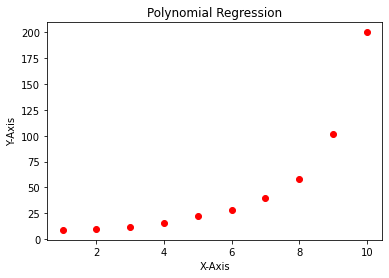

In [12]:
# Fitting plynomial regression

# import libraries
import matplotlib.pyplot as plt
import numpy as np

# create X and Y lists
X=[1,2,3,4,5,6,7,8,9,10]
y=[9,10,12,16,22,28,40,58,102,200]

# plot scatter diagram
plt.scatter(X,y, color='red')
plt.title('Polynomial Regression')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

Text(0, 0.5, 'Y-Axis')

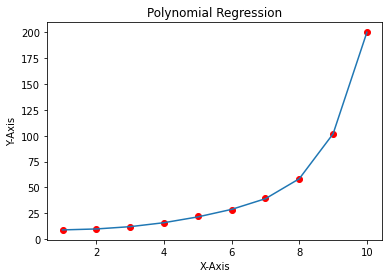

In [25]:
# import libraries
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# prepare dataset
data = pd.DataFrame({"X":[1,2,3,4,5,6,7,8,9,10],"y":[9,10,12,16,22,28,40,58,102,200]})

# code without data[['X']] and data[['y']] doesn't work
X = data[['X']].values
y = data[['y']].values

# Apply Polynomial Features
polynomial_reg = PolynomialFeatures(degree = 6)
X_polynomial = polynomial_reg.fit_transform(X)

# Apply Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_polynomial, y)
predictions = lin_reg.predict(X_polynomial)

# plot the results
plt.scatter(X,y, color = 'red')
plt.plot(X, predictions)
plt.title('Polynomial Regression')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

In [26]:
# implement logistic regression using scikit-learn

# import libraries
import pandas as pd

# read the dataset
diabets = pd.read_csv("diabetes.csv")

# show top 5-records
diabets.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
# split dataset in two parts: feature set and target label
feature_set = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

features = diabets[feature_set]

target = diabets.label

# Partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [29]:
# import logistic regression sckit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# instantiate the model
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(feature_train, target_train)

# forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

# Asses model performance using accuracy measure
print("Logistic Regression Model Accuracy: ", accuracy_score(target_test, predictions))


Logistic Regression Model Accuracy:  0.7835497835497836
